In [154]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from coniii import *
from math import exp
import numpy as np
import sys
import pickle as pkl

import context_wrangling as cw
import load_data as ld

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
winds = [13]
cat = "full"

In [168]:
wordcount_window, word_dict, window_dict = ld.load_counts("full")

In [172]:
context_samples = cw.sample_contexts_wind(cat, winds[0], frame=20, samples=1000000)
context_counts = cw.context_to_count(context_samples, top_n=50)[:,:-1]
ising_sample = np.where(context_counts > 0, 1, -1)
ising_sample

array([[-1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1,  1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [170]:
with open(f"objects/{cat}/{cat}_context_samples.pkl", "wb") as f:
    pkl.dump(context_samples, f)

In [171]:
context_counts.mean(axis=0)

array([0.061567, 0.044712, 0.084567, 0.06774 , 0.111322, 0.048651,
       0.049984, 0.050901, 0.054317, 0.054012, 0.049271, 0.061622,
       0.027694, 0.078952, 0.062958, 0.06886 , 0.046704, 0.031062,
       0.06019 , 0.039323, 0.061339, 0.051525, 0.047687, 0.064601,
       0.010376, 0.046036, 0.038232, 0.063933, 0.03675 , 0.02931 ,
       0.050411, 0.045041, 0.051981, 0.042273, 0.031725, 0.049396,
       0.043509, 0.046622, 0.018201, 0.040962, 0.067049, 0.011619,
       0.034344, 0.026345, 0.004259, 0.040309, 0.032329, 0.055264,
       0.047319, 0.043953, 0.029231, 0.038027, 0.04988 , 0.040816,
       0.026516, 0.02827 , 0.03514 , 0.04015 , 0.027506, 0.032661,
       0.03129 , 0.017388, 0.027166, 0.033513, 0.027186, 0.015168,
       0.034307, 0.032512, 0.041535, 0.023704, 0.0171  , 0.037886,
       0.020415, 0.016534, 0.022155, 0.025235, 0.049796, 0.012516,
       0.005213, 0.029331, 0.039488, 0.008916, 0.032789, 0.029976,
       0.018958, 0.011755, 0.024607, 0.014807, 0.034097, 0.036

In [173]:
ising_sample.mean(axis=0)

array([-0.891416, -0.93067 , -0.845026, -0.878592, -0.806302, -0.91424 ,
       -0.912784, -0.906828, -0.90041 , -0.904742, -0.912416, -0.890344,
       -0.948224, -0.8554  , -0.88945 , -0.876448, -0.915   , -0.941002,
       -0.888424, -0.9265  , -0.887578, -0.904118, -0.915226, -0.883016,
       -0.980266, -0.91746 , -0.932928, -0.876802, -0.933034, -0.945042,
       -0.908898, -0.917388, -0.900776, -0.928792, -0.942178, -0.914052,
       -0.917674, -0.917506, -0.965468, -0.926664, -0.890824, -0.978542,
       -0.935192, -0.952434, -0.993118, -0.925014, -0.94835 , -0.899362,
       -0.92894 , -0.91878 ])

Text(0.5, 1.0, 'Ising means')

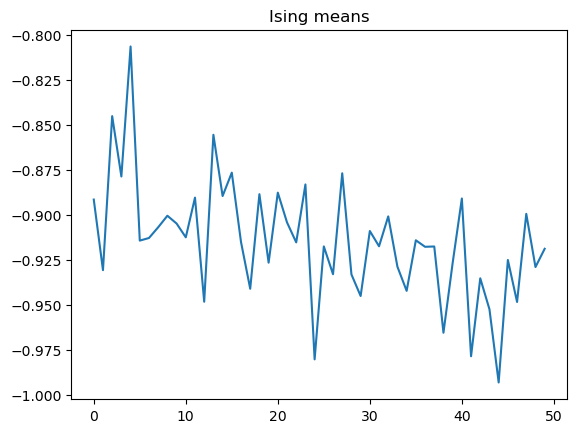

In [174]:
plt.plot(range(50), ising_sample.mean(axis=0))
plt.title("Ising means")

In [175]:
solver = Pseudo(ising_sample)
output = solver.solve(reg_scale=0)

/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:96: UserWarning: Assuming that calc_observables should be for Ising model.
  if iprint: warn("Assuming that calc_observables should be for Ising model.")


testing


/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:1777: RuntimeWarning: overflow encountered in exp
  dloglikelihood = ( -(1/(1+np.exp(2*E)) * np.exp(2*E))[:,None] * 2*obs[r] ).sum(0)
/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:1778: RuntimeWarning: overflow encountered in exp
  return -loglikelihood, dloglikelihood
/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:1778: RuntimeWarning: invalid value encountered in multiply
  return -loglikelihood, dloglikelihood
/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:1777: RuntimeWarning: overflow encountered in exp
  dloglikelihood = ( -(1/(1+np.exp(2*E)) * np.exp(2*E))[:,None] * 2*obs[r] ).sum(0)
/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:1778: RuntimeWarning: overflow encountered in exp
  return -loglikelihood, dloglikelihood
/h

In [176]:
model = solver.model
model.setup_sampler()
model.generate_sample(100*solver.n, 1000*solver.n, multipliers=solver.multipliers)
obs = solver.calc_observables(model.sample).mean(0)

spin_means = obs[:solver.n]
spin_pair_corr = obs[solver.n:]

/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/samplers.py:1180: UserWarning: Assuming that the model is Ising.
  if iprint: warn("Assuming that the model is Ising.")


In [177]:
model.sample.mean(0)

array([-0.902, -0.936, -0.846, -0.884, -0.826, -0.916, -0.916, -0.904,
       -0.896, -0.89 , -0.916, -0.876, -0.964, -0.858, -0.87 , -0.86 ,
       -0.928, -0.958, -0.908, -0.926, -0.882, -0.908, -0.91 , -0.88 ,
       -0.982, -0.926, -0.926, -0.888, -0.94 , -0.956, -0.914, -0.928,
       -0.91 , -0.918, -0.956, -0.916, -0.894, -0.924, -0.962, -0.924,
       -0.864, -0.976, -0.936, -0.95 , -0.996, -0.924, -0.962, -0.918,
       -0.908, -0.904])

In [178]:
spin_means

array([-0.902, -0.936, -0.846, -0.884, -0.826, -0.916, -0.916, -0.904,
       -0.896, -0.89 , -0.916, -0.876, -0.964, -0.858, -0.87 , -0.86 ,
       -0.928, -0.958, -0.908, -0.926, -0.882, -0.908, -0.91 , -0.88 ,
       -0.982, -0.926, -0.926, -0.888, -0.94 , -0.956, -0.914, -0.928,
       -0.91 , -0.918, -0.956, -0.916, -0.894, -0.924, -0.962, -0.924,
       -0.864, -0.976, -0.936, -0.95 , -0.996, -0.924, -0.962, -0.918,
       -0.908, -0.904])

Text(0.5, 1.0, 'Solver biases')

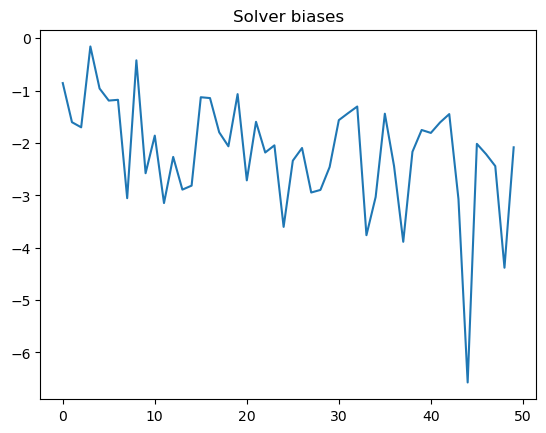

In [179]:
plt.plot(range(solver.n), solver.multipliers[:solver.n])
plt.title("Solver biases")

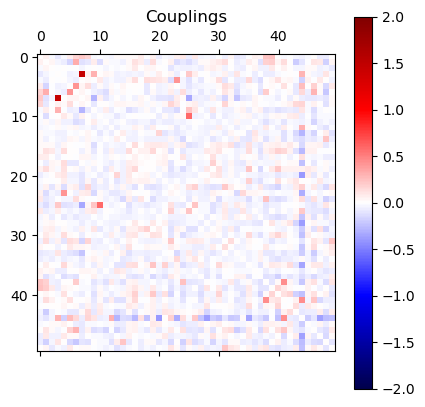

In [180]:
from scipy.spatial.distance import squareform 

square_couplings = squareform(solver.multipliers[solver.n:])

plt.matshow(square_couplings, cmap="seismic", vmin=-2, vmax=2)
plt.title("Couplings")
plt.colorbar()

(-1.0, -0.75)

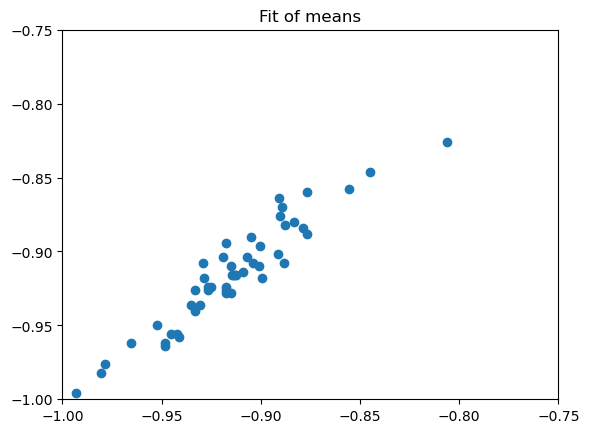

In [181]:
plt.scatter(ising_sample.mean(axis=0), spin_means)
plt.title("Fit of means")
plt.xlim((-1, -0.75))
plt.ylim((-1, -0.75))

In [14]:
pairs = two_tuple_arr.coords.transpose()

In [17]:
repeated_pairs = np.repeat(pairs, two_tuple_arr.data, axis=0)

In [19]:
repeated_pairs.shape[0]

130296

In [20]:
two_tuple_arr.data.sum()

130296

In [11]:
two_tuple_arrs = {}
three_tuple_arrs = {}

for wind in winds:
    with open(f"objects/{cat}/{cat}_2tuple_arr_{wind}.pkl", "rb") as f:
        two_tuple_arr = pkl.load(f)

    with open(f"objects/{cat}/{cat}_3tuple_arr_{wind}.pkl", "rb") as f:
        three_tuple_arr = pkl.load(f)
    
    two_tuple_arrs[wind] = two_tuple_arr
    three_tuple_arrs[wind] = three_tuple_arr